# Association of Genre and Revenues in Global vs. Domestic Markets

Begin by importing necessary packages and defining file paths, global variables, and any common functions/objects:

In [1]:
#importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
#file paths for importing data
#NOTE that some unzipped files are too large for the github repo and must be extracted locally before analysis can be performed
movie_budget_file_path = '~/Documents/Flatiron/phase_1/Movie_Studio_DATA/tn.movie_budgets.csv.gz'
microsoft_movie_studio_db_file_path = './../Movie_Studio_DATA/im.db'
msms_db_conn = sqlite3.connect(microsoft_movie_studio_db_file_path)

Read in data from needed data files (*note the above file paths due to data file sizes*)

In [3]:
#reading in movie budget csv for outcome data
movie_budget_df = pd.read_csv(movie_budget_file_path)
#check to see if read properly
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
#execute SQL query to obtain a dataframe with movie names and avg ratings, filtered for original titles
genre_query = """
SELECT movie_basics.primary_title, movie_basics.start_year, movie_basics.genres
FROM movie_basics
INNER JOIN movie_akas ON movie_basics.movie_id = movie_akas.movie_id
WHERE is_original_title != 0.0
"""

filtered_genre_info_df = pd.read_sql(genre_query, msms_db_conn)

#check query results
filtered_genre_info_df

,primary_title,start_year,genres
0,Jurassic World,2015,"Action,Adventure,Sci-Fi"
1,John Carter,2012,"Action,Adventure,Sci-Fi"
2,Versailles Rediscovered - The Sun King's Vanis...,2019,Documentary
3,Miguelito,2019,"Documentary,Music"
4,Thing I Don't Get,2018,Drama
...,...,...,...
44695,Anderswo. Allein in Afrika,2018,"Adventure,Documentary"
44696,Monkey King: The Volcano,2019,"Action,Adventure,Comedy"
44697,Big Shark,2019,Horror
44698,Farewell Song,2019,"Music,Romance"


In [5]:
#attempt to merge genre data with budget data for comparison of dependent/independent variables
genre_budget_df = pd.merge(filtered_genre_info_df, 
                                  movie_budget_df, 
                                  how='inner', 
                                  left_on='primary_title', 
                                  right_on='movie' )

In [6]:
genre_budget_df

,primary_title,start_year,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Jurassic World,2015,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864"
1,John Carter,2012,"Action,Adventure,Sci-Fi",14,"Mar 9, 2012",John Carter,"$275,000,000","$73,058,679","$282,778,100"
2,Alice in Wonderland,2010,"Adventure,Family,Fantasy",51,"Mar 5, 2010",Alice in Wonderland,"$200,000,000","$334,191,110","$1,025,491,110"
3,Alice in Wonderland,2010,"Adventure,Family,Fantasy",60,"Jul 28, 1951",Alice in Wonderland,"$3,000,000",$0,$0
4,The Bourne Legacy,2012,"Action,Adventure,Thriller",76,"Aug 10, 2012",The Bourne Legacy,"$125,000,000","$113,203,870","$280,355,920"
...,...,...,...,...,...,...,...,...,...
2431,Thoroughbreds,2017,"Comedy,Crime,Drama",47,"Mar 9, 2018",Thoroughbreds,"$5,000,000","$3,072,605","$3,187,302"
2432,Aladdin,2019,"Adventure,Comedy,Family",81,"May 24, 2019",Aladdin,"$182,000,000","$246,734,314","$619,234,314"
2433,Aladdin,2019,"Adventure,Comedy,Family",33,"Nov 11, 1992",Aladdin,"$28,000,000","$217,350,219","$504,050,219"
2434,November,2017,"Drama,Fantasy,Horror",81,"Jul 22, 2005",November,"$250,000","$191,862","$191,862"


Begin Data Cleaning:

In [7]:
#Identified a number of duplicate entries
genre_budget_df["primary_title"].value_counts()

Home                   33
Brothers               12
The Island             10
Crossroads              8
Hamlet                  8
                       ..
The Nut Job             1
Hobo with a Shotgun     1
Black and White         1
Dum Maaro Dum           1
Never Again             1
Name: primary_title, Length: 1985, dtype: int64

In [8]:
#Removing duplicate entries
genre_budget_df.drop_duplicates(subset="primary_title", inplace=True)

In [9]:
genre_budget_df

,primary_title,start_year,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Jurassic World,2015,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864"
1,John Carter,2012,"Action,Adventure,Sci-Fi",14,"Mar 9, 2012",John Carter,"$275,000,000","$73,058,679","$282,778,100"
2,Alice in Wonderland,2010,"Adventure,Family,Fantasy",51,"Mar 5, 2010",Alice in Wonderland,"$200,000,000","$334,191,110","$1,025,491,110"
4,The Bourne Legacy,2012,"Action,Adventure,Thriller",76,"Aug 10, 2012",The Bourne Legacy,"$125,000,000","$113,203,870","$280,355,920"
5,Limitless,2011,"Mystery,Sci-Fi,Thriller",91,"Mar 18, 2011",Limitless,"$27,000,000","$79,249,455","$155,564,919"
...,...,...,...,...,...,...,...,...,...
2430,The Big Sick,2017,"Comedy,Drama,Romance",64,"Jun 23, 2017",The Big Sick,"$5,000,000","$42,872,467","$53,972,860"
2431,Thoroughbreds,2017,"Comedy,Crime,Drama",47,"Mar 9, 2018",Thoroughbreds,"$5,000,000","$3,072,605","$3,187,302"
2432,Aladdin,2019,"Adventure,Comedy,Family",81,"May 24, 2019",Aladdin,"$182,000,000","$246,734,314","$619,234,314"
2434,November,2017,"Drama,Fantasy,Horror",81,"Jul 22, 2005",November,"$250,000","$191,862","$191,862"


In [10]:
#removing special characters from columns for conversion to numeric data type
genre_budget_df['production_budget'] = genre_budget_df['production_budget'].replace(",","",regex=True)
genre_budget_df['production_budget'] = genre_budget_df['production_budget'].str.replace("$","",regex=True)

genre_budget_df['domestic_gross'] = genre_budget_df['domestic_gross'].replace(",","",regex=True)
genre_budget_df['domestic_gross'] = genre_budget_df['domestic_gross'].str.replace("$","",regex=True)

genre_budget_df['worldwide_gross'] = genre_budget_df['worldwide_gross'].replace(",","",regex=True)
genre_budget_df['worldwide_gross'] = genre_budget_df['worldwide_gross'].str.replace("$","",regex=True)

#check replacement
genre_budget_df.head()

,primary_title,start_year,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Jurassic World,2015,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864
1,John Carter,2012,"Action,Adventure,Sci-Fi",14,"Mar 9, 2012",John Carter,275000000,73058679,282778100
2,Alice in Wonderland,2010,"Adventure,Family,Fantasy",51,"Mar 5, 2010",Alice in Wonderland,200000000,334191110,1025491110
4,The Bourne Legacy,2012,"Action,Adventure,Thriller",76,"Aug 10, 2012",The Bourne Legacy,125000000,113203870,280355920
5,Limitless,2011,"Mystery,Sci-Fi,Thriller",91,"Mar 18, 2011",Limitless,27000000,79249455,155564919


In [11]:
#convert money columns to floating point values
genre_budget_df['production_budget'] = genre_budget_df['production_budget'].astype(float)
genre_budget_df['domestic_gross'] = genre_budget_df['domestic_gross'].astype(float)
genre_budget_df['worldwide_gross'] = genre_budget_df['worldwide_gross'].astype(float)

In [12]:
genre_budget_df

,primary_title,start_year,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Jurassic World,2015,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09
1,John Carter,2012,"Action,Adventure,Sci-Fi",14,"Mar 9, 2012",John Carter,275000000.0,73058679.0,2.827781e+08
2,Alice in Wonderland,2010,"Adventure,Family,Fantasy",51,"Mar 5, 2010",Alice in Wonderland,200000000.0,334191110.0,1.025491e+09
4,The Bourne Legacy,2012,"Action,Adventure,Thriller",76,"Aug 10, 2012",The Bourne Legacy,125000000.0,113203870.0,2.803559e+08
5,Limitless,2011,"Mystery,Sci-Fi,Thriller",91,"Mar 18, 2011",Limitless,27000000.0,79249455.0,1.555649e+08
...,...,...,...,...,...,...,...,...,...
2430,The Big Sick,2017,"Comedy,Drama,Romance",64,"Jun 23, 2017",The Big Sick,5000000.0,42872467.0,5.397286e+07
2431,Thoroughbreds,2017,"Comedy,Crime,Drama",47,"Mar 9, 2018",Thoroughbreds,5000000.0,3072605.0,3.187302e+06
2432,Aladdin,2019,"Adventure,Comedy,Family",81,"May 24, 2019",Aladdin,182000000.0,246734314.0,6.192343e+08
2434,November,2017,"Drama,Fantasy,Horror",81,"Jul 22, 2005",November,250000.0,191862.0,1.918620e+05


In [13]:
#remove rows with non-null-type null values
genre_budget_df = genre_budget_df[genre_budget_df['production_budget'] != 0] 
genre_budget_df = genre_budget_df[genre_budget_df['domestic_gross'] != 0]
genre_budget_df = genre_budget_df[genre_budget_df['worldwide_gross'] != 0]
#reevaluate the data
genre_budget_df

,primary_title,start_year,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Jurassic World,2015,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09
1,John Carter,2012,"Action,Adventure,Sci-Fi",14,"Mar 9, 2012",John Carter,275000000.0,73058679.0,2.827781e+08
2,Alice in Wonderland,2010,"Adventure,Family,Fantasy",51,"Mar 5, 2010",Alice in Wonderland,200000000.0,334191110.0,1.025491e+09
4,The Bourne Legacy,2012,"Action,Adventure,Thriller",76,"Aug 10, 2012",The Bourne Legacy,125000000.0,113203870.0,2.803559e+08
5,Limitless,2011,"Mystery,Sci-Fi,Thriller",91,"Mar 18, 2011",Limitless,27000000.0,79249455.0,1.555649e+08
...,...,...,...,...,...,...,...,...,...
2430,The Big Sick,2017,"Comedy,Drama,Romance",64,"Jun 23, 2017",The Big Sick,5000000.0,42872467.0,5.397286e+07
2431,Thoroughbreds,2017,"Comedy,Crime,Drama",47,"Mar 9, 2018",Thoroughbreds,5000000.0,3072605.0,3.187302e+06
2432,Aladdin,2019,"Adventure,Comedy,Family",81,"May 24, 2019",Aladdin,182000000.0,246734314.0,6.192343e+08
2434,November,2017,"Drama,Fantasy,Horror",81,"Jul 22, 2005",November,250000.0,191862.0,1.918620e+05


In [14]:
genre_budget_df["genres"].value_counts()

Drama                         119
Adventure,Animation,Comedy     67
Comedy                         64
Comedy,Drama,Romance           61
Comedy,Drama                   59
                             ... 
Adventure,Drama,Sport           1
Drama,Mystery,War               1
Animation,Drama                 1
Comedy,Fantasy,Thriller         1
Family                          1
Name: genres, Length: 258, dtype: int64

In [15]:
#create singular genres column, split genre strings along comma delimiter, 
#and return a column storing a list of genres stored as string values
genre_budget_df['singular_genres'] = genre_budget_df["genres"].str.split(",")

In [16]:
genre_budget_df

,primary_title,start_year,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,singular_genres
0,Jurassic World,2015,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,"[Action, Adventure, Sci-Fi]"
1,John Carter,2012,"Action,Adventure,Sci-Fi",14,"Mar 9, 2012",John Carter,275000000.0,73058679.0,2.827781e+08,"[Action, Adventure, Sci-Fi]"
2,Alice in Wonderland,2010,"Adventure,Family,Fantasy",51,"Mar 5, 2010",Alice in Wonderland,200000000.0,334191110.0,1.025491e+09,"[Adventure, Family, Fantasy]"
4,The Bourne Legacy,2012,"Action,Adventure,Thriller",76,"Aug 10, 2012",The Bourne Legacy,125000000.0,113203870.0,2.803559e+08,"[Action, Adventure, Thriller]"
5,Limitless,2011,"Mystery,Sci-Fi,Thriller",91,"Mar 18, 2011",Limitless,27000000.0,79249455.0,1.555649e+08,"[Mystery, Sci-Fi, Thriller]"
...,...,...,...,...,...,...,...,...,...,...
2430,The Big Sick,2017,"Comedy,Drama,Romance",64,"Jun 23, 2017",The Big Sick,5000000.0,42872467.0,5.397286e+07,"[Comedy, Drama, Romance]"
2431,Thoroughbreds,2017,"Comedy,Crime,Drama",47,"Mar 9, 2018",Thoroughbreds,5000000.0,3072605.0,3.187302e+06,"[Comedy, Crime, Drama]"
2432,Aladdin,2019,"Adventure,Comedy,Family",81,"May 24, 2019",Aladdin,182000000.0,246734314.0,6.192343e+08,"[Adventure, Comedy, Family]"
2434,November,2017,"Drama,Fantasy,Horror",81,"Jul 22, 2005",November,250000.0,191862.0,1.918620e+05,"[Drama, Fantasy, Horror]"


In [17]:
#create new dataframe containing exploded singular genres as new rows
little_boy_df = genre_budget_df.explode("singular_genres")

In [18]:
little_boy_df.head()

,primary_title,start_year,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,singular_genres
0,Jurassic World,2015,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,Action
0,Jurassic World,2015,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,Adventure
0,Jurassic World,2015,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,Sci-Fi
1,John Carter,2012,"Action,Adventure,Sci-Fi",14,"Mar 9, 2012",John Carter,275000000.0,73058679.0,2.827781e+08,Action
1,John Carter,2012,"Action,Adventure,Sci-Fi",14,"Mar 9, 2012",John Carter,275000000.0,73058679.0,2.827781e+08,Adventure


In [19]:
#add columns for foreign gross revenues, as well as net domestic, total, and foreign profits.
little_boy_df["foreign_market_gross"] = little_boy_df["worldwide_gross"] - little_boy_df["domestic_gross"]
little_boy_df["domestic_net"] = little_boy_df["domestic_gross"] - little_boy_df["production_budget"]
little_boy_df["worldwide_net"] = little_boy_df["worldwide_gross"] - little_boy_df["production_budget"]
little_boy_df["foreign_market_net"] = little_boy_df["foreign_market_gross"] - little_boy_df["production_budget"]

In [20]:
little_boy_df

,primary_title,start_year,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,singular_genres,foreign_market_gross,domestic_net,worldwide_net,foreign_market_net
0,Jurassic World,2015,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,Action,996584239.0,437270625.0,1.433855e+09,781584239.0
0,Jurassic World,2015,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,Adventure,996584239.0,437270625.0,1.433855e+09,781584239.0
0,Jurassic World,2015,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,Sci-Fi,996584239.0,437270625.0,1.433855e+09,781584239.0
1,John Carter,2012,"Action,Adventure,Sci-Fi",14,"Mar 9, 2012",John Carter,275000000.0,73058679.0,2.827781e+08,Action,209719421.0,-201941321.0,7.778100e+06,-65280579.0
1,John Carter,2012,"Action,Adventure,Sci-Fi",14,"Mar 9, 2012",John Carter,275000000.0,73058679.0,2.827781e+08,Adventure,209719421.0,-201941321.0,7.778100e+06,-65280579.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,November,2017,"Drama,Fantasy,Horror",81,"Jul 22, 2005",November,250000.0,191862.0,1.918620e+05,Drama,0.0,-58138.0,-5.813800e+04,-250000.0
2434,November,2017,"Drama,Fantasy,Horror",81,"Jul 22, 2005",November,250000.0,191862.0,1.918620e+05,Fantasy,0.0,-58138.0,-5.813800e+04,-250000.0
2434,November,2017,"Drama,Fantasy,Horror",81,"Jul 22, 2005",November,250000.0,191862.0,1.918620e+05,Horror,0.0,-58138.0,-5.813800e+04,-250000.0
2435,Never Again,2018,"Documentary,Music",47,"Jul 12, 2002",Never Again,500000.0,307631.0,3.087930e+05,Documentary,1162.0,-192369.0,-1.912070e+05,-498838.0


In [21]:
#aggregate new dataframe by singular genres
genre_average_df = little_boy_df.groupby(by="singular_genres", as_index=False).mean()

In [22]:
#sort and save a series of dataframes so that graphs are produced with bars ordered by y-values
worldwide_gross = genre_average_df.sort_values(by="worldwide_gross", ascending=False)
domestic_gross = genre_average_df.sort_values(by="domestic_gross", ascending=False)
foreign_gross = genre_average_df.sort_values(by="foreign_market_gross", ascending=False)
worldwide_net = genre_average_df.sort_values(by="worldwide_net", ascending=False)
domestic_net = genre_average_df.sort_values(by="domestic_net", ascending=False)
foreign_net = genre_average_df.sort_values(by="foreign_market_net", ascending=False)

# Visualizations and Descriptive Analysis

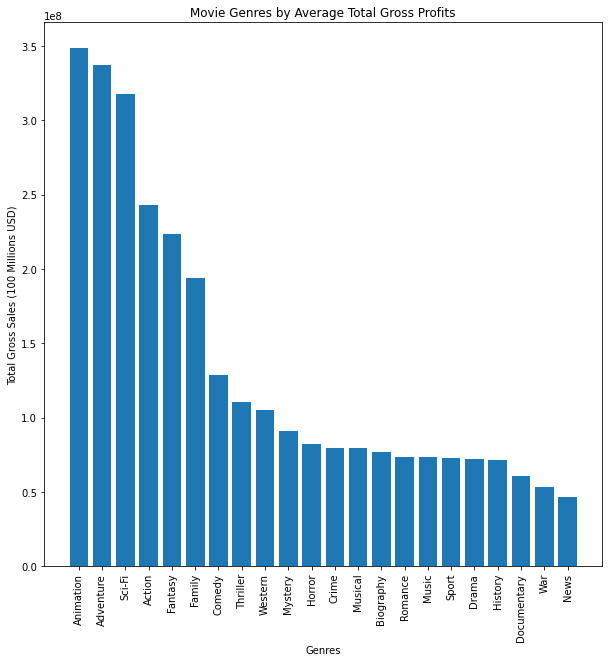

In [23]:
#graph of total gross sales vs. genre
fig, ax = plt.subplots(figsize=(10,10))

x = worldwide_gross["singular_genres"]
y = worldwide_gross["worldwide_gross"]

ax.bar(x,y)
ax.set_title("Movie Genres by Average Total Gross Profits")
ax.set_xlabel("Genres")
ax.set_ylabel("Total Gross Sales (100 Millions USD)")
plt.xticks(rotation=90);

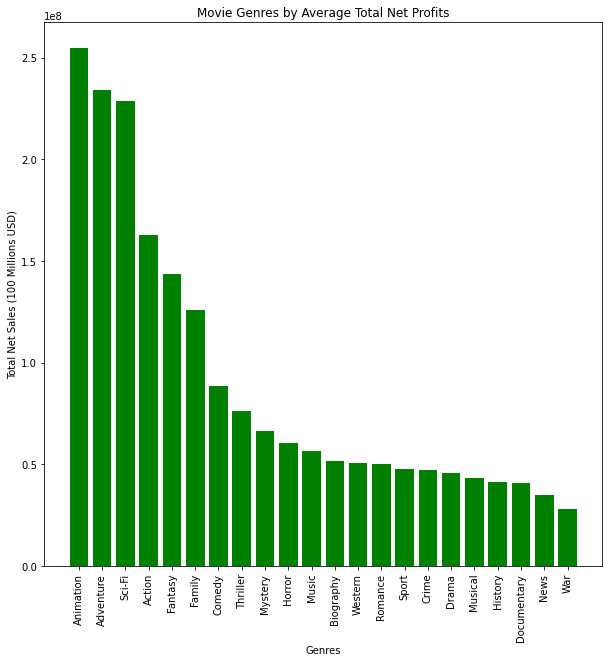

In [24]:
#graph of total net sales vs. genre
fig, ax = plt.subplots(figsize=(10,10))

x = worldwide_net["singular_genres"]
y = worldwide_net["worldwide_net"]

ax.bar(x,y,color='green')
ax.set_title("Movie Genres by Average Total Net Profits")
ax.set_xlabel("Genres")
ax.set_ylabel("Total Net Sales (100 Millions USD)")
plt.xticks(rotation=90);

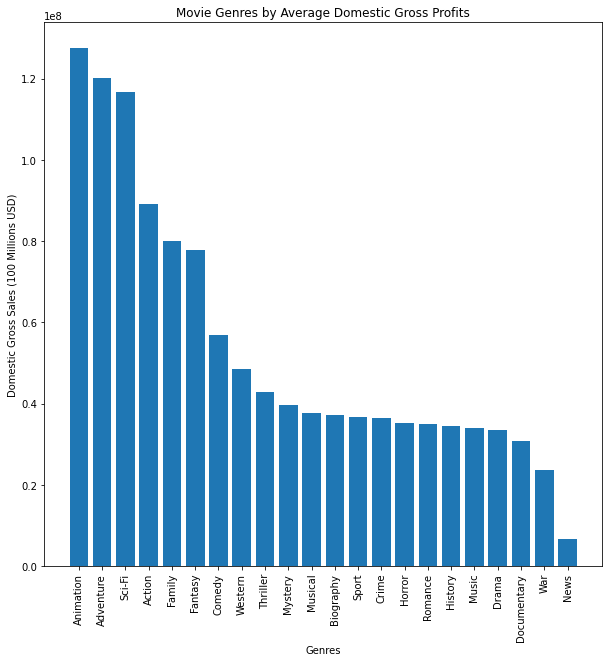

In [25]:
#graph of domestic gross sales vs. genre
fig, ax = plt.subplots(figsize=(10,10))

x = domestic_gross["singular_genres"]
y = domestic_gross["domestic_gross"]

ax.bar(x,y)
ax.set_title("Movie Genres by Average Domestic Gross Profits")
ax.set_xlabel("Genres")
ax.set_ylabel("Domestic Gross Sales (100 Millions USD)")
plt.xticks(rotation=90);

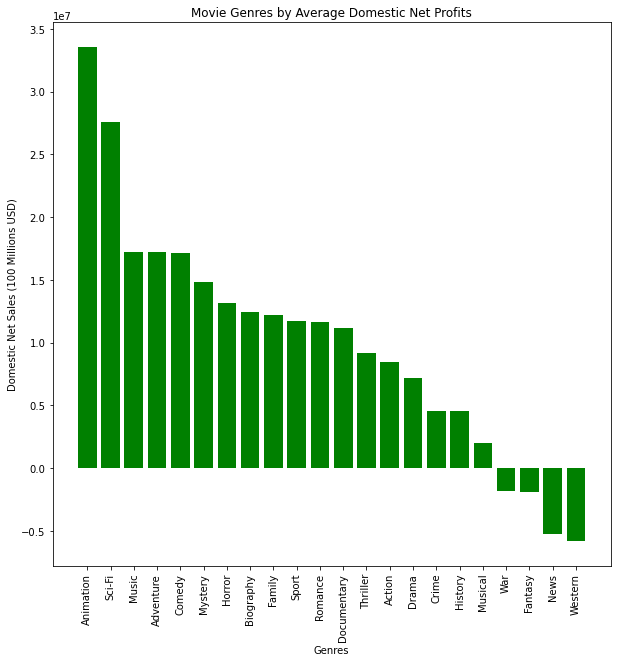

In [26]:
#graph of domestic net sales vs. genre
fig, ax = plt.subplots(figsize=(10,10))

x = domestic_net["singular_genres"]
y = domestic_net["domestic_net"]

ax.bar(x,y,color='green')
ax.set_title("Movie Genres by Average Domestic Net Profits")
ax.set_xlabel("Genres")
ax.set_ylabel("Domestic Net Sales (100 Millions USD)")
plt.xticks(rotation=90);

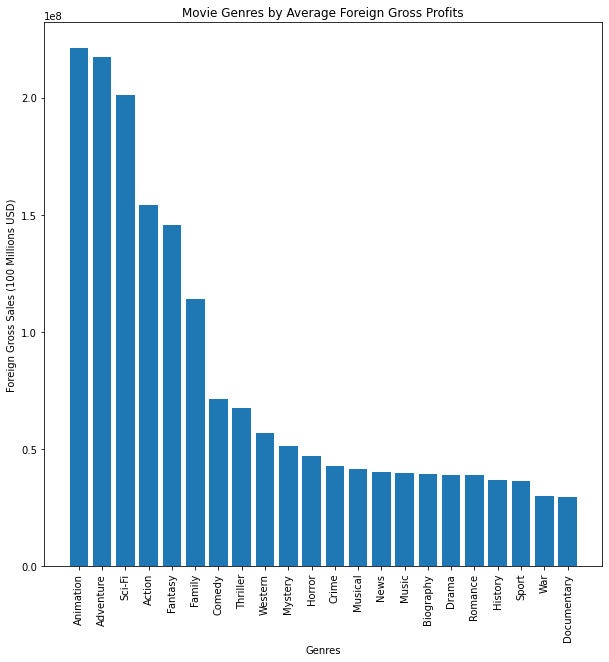

In [27]:
#graph of foreign gross sales vs. genre
fig, ax = plt.subplots(figsize=(10,10))

x = foreign_gross["singular_genres"]
y = foreign_gross["foreign_market_gross"]

ax.bar(x,y)
ax.set_title("Movie Genres by Average Foreign Gross Profits")
ax.set_xlabel("Genres")
ax.set_ylabel("Foreign Gross Sales (100 Millions USD)")
plt.xticks(rotation=90);

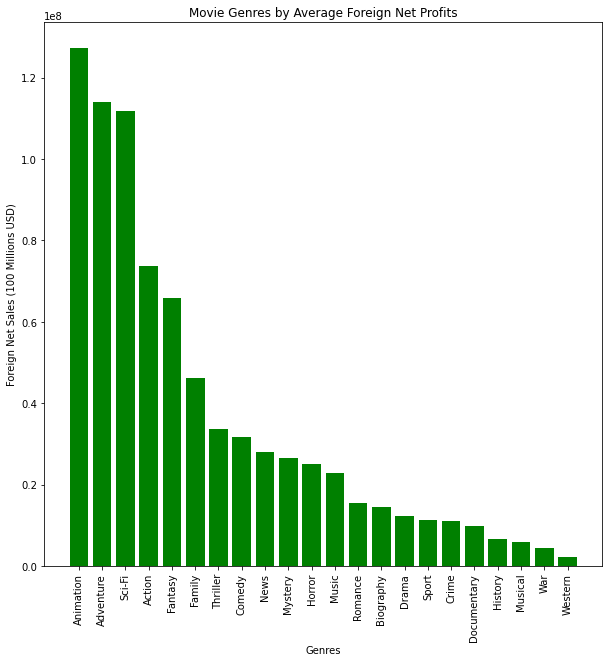

In [28]:
#graph of foreign net sales vs. genre
fig, ax = plt.subplots(figsize=(10,10))

x = foreign_net["singular_genres"]
y = foreign_net["foreign_market_net"]

ax.bar(x,y,color='green')
ax.set_title("Movie Genres by Average Foreign Net Profits")
ax.set_xlabel("Genres")
ax.set_ylabel("Foreign Net Sales (100 Millions USD)")
plt.xticks(rotation=90);

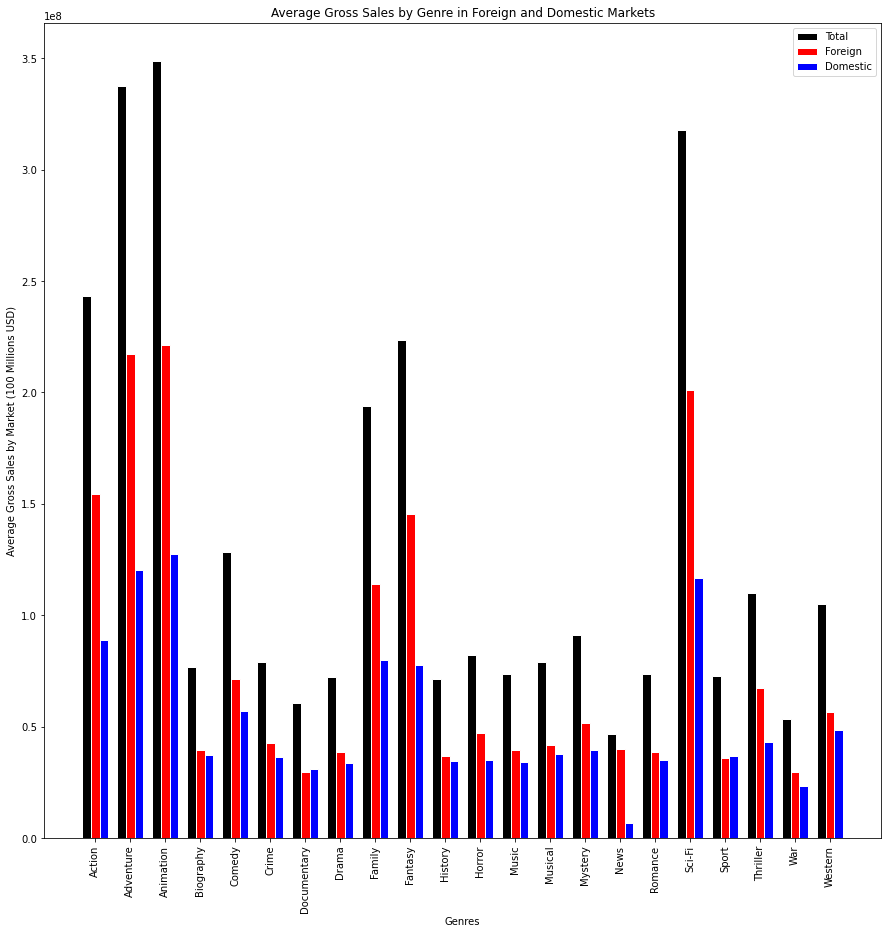

In [29]:
#Market performance comparison chart for gross revenues

#variables/data inputs
x = genre_average_df["singular_genres"]
bar1 = genre_average_df["worldwide_gross"]
bar2 = genre_average_df["foreign_market_gross"]
bar3 = genre_average_df["domestic_gross"]

#formatting
barwidth = 0.25
r1 = np.arange(len(bar1))
r2 = [z + barwidth for z in r1]
r3 = [z + barwidth for z in r2]

#creating the chart
fig = plt.subplots(figsize=(15,15))
plt.bar(r1, bar1, color='black', width=barwidth, edgecolor='white', label='Total')
plt.bar(r2, bar2, color='red', width=barwidth, edgecolor='white', label='Foreign')
plt.bar(r3, bar3, color='blue', width=barwidth, edgecolor='white', label='Domestic')
#labelling
plt.title("Average Gross Sales by Genre in Foreign and Domestic Markets")
plt.xlabel("Genres")
plt.ylabel("Average Gross Sales by Market (100 Millions USD)")
plt.xticks([a + barwidth for a in range(len(bar1))], x, rotation=90)
plt.legend();

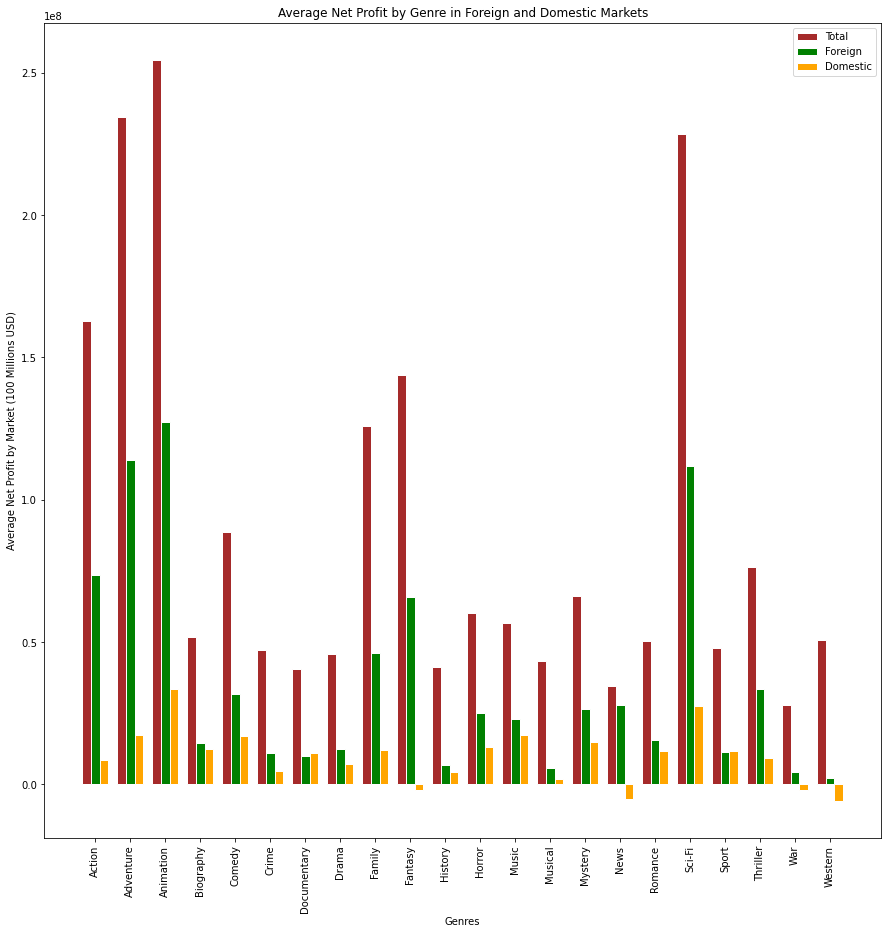

In [30]:
#Market performance comparison chart for net profits

#variables/data inputs
x = genre_average_df["singular_genres"]
bar1 = genre_average_df["worldwide_net"]
bar2 = genre_average_df["foreign_market_net"]
bar3 = genre_average_df["domestic_net"]

#formatting
barwidth = 0.25
r1 = np.arange(len(bar1))
r2 = [z + barwidth for z in r1]
r3 = [z + barwidth for z in r2]

#creating the chart
fig = plt.subplots(figsize=(15,15))
plt.bar(r1, bar1, color='brown', width=barwidth, edgecolor='white', label='Total')
plt.bar(r2, bar2, color='green', width=barwidth, edgecolor='white', label='Foreign')
plt.bar(r3, bar3, color='orange', width=barwidth, edgecolor='white', label='Domestic')
#labelling
plt.title("Average Net Profit by Genre in Foreign and Domestic Markets")
plt.xlabel("Genres")
plt.ylabel("Average Net Profit by Market (100 Millions USD)")
plt.xticks([a + barwidth for a in range(len(bar1))], x, rotation=90)
plt.legend();